In [11]:
# get source index based on SSTc2d/SSTgb id
SSTid = 'J032800.3+300801'
from astropy.io import ascii

# Table: Properties of the c2d+GB YSOs
# ================================================================================
# Byte-by-byte Description of file: apjs519129t2_mrt.txt
# --------------------------------------------------------------------------------
#    Bytes Format Units  Label   Explanations
# --------------------------------------------------------------------------------
#    1-  4 I4     ---    Index   Index
#    6- 21 A16    ---    Cloud   Cloud identifier
#   23- 38 A16    ---    ID      SSTc2d or SSTgb + Spitzer source name  
#   40- 43 F4.1   mag    AV      The V band extinction 
#   45- 51 F7.2   ---    alpha   Observed spectral index
#   53- 58 F6.1   K      Tbol    Observed bolometric temperature
#   60- 69 F10.5  solLum Lbol    Observed bolometric luminosity
#   71- 77 F7.2   ---    alpha'  Extinction corrected spectral index
#   79- 84 F6.1   K      Tbol'   Extinction corrected bolometric temperature
#   86- 95 F10.5  solLum Lbol'   Extinction corrected bolometric luminosity
#   97- 97 A1     ---    AGB?    A likely AGB? Y or N
#   99- 99 A1     ---    Core?   Source has a core?
# --------------------------------------------------------------------------------


filename = '/Users/yaolun/data/Dunham15_c2dGB/apjs519129t2_mrt.txt'
data = ascii.read(filename, data_start=24, delimiter=' ',
                  names=['Index','Cloud','SSTid','Av','alpha','T_bol','L_bol',
                         'alpha_extcor','T_bol_extcor','L_bol_extcor','AGB_flag','Core_flag'])

data[data['SSTid'] == SSTid]

Index,Cloud,SSTid,Av,alpha,T_bol,L_bol,alpha_extcor,T_bol_extcor,L_bol_extcor,AGB_flag,Core_flag
int64,str16,str16,float64,float64,float64,float64,float64,float64,float64,str1,str1
2369,Perseus,J032800.3+300801,5.9,0.95,230.0,0.25,0.98,280.0,0.29,N,Y


### Uncertainty of extinction correction on alpha

In [13]:
print(data['alpha_extcor'].max())

4.89


In [18]:
import numpy as np
classI = data['alpha_extcor'] > 0.3
flat = (data['alpha_extcor'] <= 0.3) & (data['alpha_extcor'] >= -0.3)
classII = (data['alpha_extcor'] < -0.3) & (data['alpha_extcor'] != -990)

diff_abs = np.absolute(data['alpha']-data['alpha_extcor'])
diff = data['alpha']-data['alpha_extcor']
print(np.mean(diff[classI]))
print(np.mean(diff[flat]))
print(np.mean(diff[classII]))

print(np.mean(diff_abs[classI]))
print(np.mean(diff_abs[flat]))
print(np.mean(diff_abs[classII]))

0.095875
0.178443396226
0.371696795399
0.20875
0.214669811321
0.375986031224


In [10]:
# get IRAC fluxes out from Dunham+16 table 2 for given source index
from astropy.io import ascii
from pprint import pprint

# ================================================================================
# Byte-by-byte Description of file: apjs519129t4_mrt.txt
# --------------------------------------------------------------------------------
#    Bytes Format Units Label  Explanations
# --------------------------------------------------------------------------------
#    1-  4 I4     ---   Index  Index 
#    6- 13 F8.2   mJy   F1.25  J band 1.25 micron flux density
#   15- 24 F10.4  mJy  eF1.25  Uncertainty in F1.25
#   26- 34 F9.3   mJy   F1.65  H band 1.65 micron flux density
#   36- 44 F9.4   mJy  eF1.65  Uncertainty in F1.65
#   46- 54 F9.2   mJy   F2.17  K_S_ band 2.17 micron flux density 
#   56- 64 F9.3   mJy  eF2.17  Uncertainty in F2.17
#   66- 74 F9.4   mJy   F3.6   Spitzer/IRAC 3.6 micron flux density
#   76- 84 F9.4   mJy  eF3.6   Uncertainty in F3.6
#   86- 93 F8.3   mJy   F4.5   Spitzer/IRAC 4.5 micron flux density
#   95-103 F9.4   mJy  eF4.5   Uncertainty in F4.5
#  105-112 F8.2   mJy   F5.8   Spitzer/IRAC 5.8 micron flux density
#  114-121 F8.3   mJy  eF5.8   Uncertainty in F5.8
#  123-130 F8.2   mJy   F8.0   Spitzer/IRAC 8.0 micron flux density
#  132-139 F8.3   mJy  eF8.0   Uncertainty in F8.0
#  141-148 F8.2   mJy   F24    Spitzer/MIPS 24 micron flux density
#  150-156 F7.2   mJy  eF24    Uncertainty in F24
#  158-163 I6     mJy   F70    Spitzer/MIPS 70 micron flux density
#  165-171 F7.1   mJy  eF70    Uncertainty in F70
# --------------------------------------------------------------------------------

# no extinction correction
filename = '/Users/yaolun/data/Dunham15_c2dGB/apjs519129t3_mrt.txt'
# extinction corrected
# filename = '/Users/yaolun/data/Dunham15_c2dGB/apjs519129t4_mrt.txt'
data = ascii.read(filename, data_start=31, names=['Index','F_J','err_J','F_H','err_H','F_Ks','err_Ks','F_IRAC1',
                                                  'err_IRAC1','F_IRAC2','err_IRAC2','F_IRAC3','err_IRAC3','F_IRAC4',
                                                  'err_IRAC4','F_MIPS24','err_MIPS24','F_MIPS70','err_MIPS70'])

data[data['Index'] == 1552]

Index,F_J,err_J,F_H,err_H,F_Ks,err_Ks,F_IRAC1,err_IRAC1,F_IRAC2,err_IRAC2,F_IRAC3,err_IRAC3,F_IRAC4,err_IRAC4,F_MIPS24,err_MIPS24,F_MIPS70,err_MIPS70
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
1552,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.3,0.29,4.9,0.49,3.6,0.51,2.3,0.44,80.0,7.5,11000,1200.0


In [26]:
def IRACmag2flux(mag, mag_err):
    # calculate the absolute flux for IRAC given magnitude
    import numpy as np 
    # Jy
    zero_mag_flux = np.array([280.9, 179.7, 115.0, 64.9])
    zero_mag_err = np.array([4.1, 2.6, 1.7, 0.9])

    # formula: F_v = F_v,o * 10^(-2/5*m)
    # error propagation: f = a^(b*A); sigma_f^2 = f^2*(b*ln(a)*sigma_A)^2
    #                    f = AB; sigma_f^2 = (sigma_A/A)^2+(sigma_B/B)^2

    flux = zero_mag_flux * 10**(-2./5*mag)
    flux_err_expo = 10**(-2./5*mag)*((-2./5*np.log(10)*mag_err)**2)**0.5
    flux_err = ((zero_mag_err/zero_mag_flux)**2 + (flux_err_expo/10**(-2./5*mag))**2)**0.5

    return flux, flux_err

def MIPSmag2flux(mag, mag_err):
    # calculate the absolute flux for IRAC given magnitude
    import numpy as np 
    # Jy
    zero_mag_flux = np.array([7.17, 0.778, 0.159])
    zero_mag_err = np.array([0.11, 0.012, 0.020])

    # formula: F_v = F_v,o * 10^(-2/5*m)
    # error propagation: f = a^(b*A); sigma_f^2 = f^2*(b*ln(a)*sigma_A)^2
    #                    f = AB; sigma_f^2 = (sigma_A/A)^2+(sigma_B/B)^2

    flux = zero_mag_flux * 10**(-2./5*mag)
    flux_err_expo = 10**(-2./5*mag)*((-2./5*np.log(10)*mag_err)**2)**0.5
    flux_err = ((zero_mag_err/zero_mag_flux)**2 + (flux_err_expo/10**(-2./5*mag))**2)**0.5

    return flux, flux_err

mag = np.array([9.15, 7.76, 6.72, 5.75])
mag_err = np.array([0.05, 0.05, 0.05, 0.05])
flux, flux_err = IRACmag2flux(mag, mag_err)

print('IRAC')
print(flux)
print(flux_err)

mag = np.array([1.43, -1.92, -4.33])
mag_err = np.array([0.04, 0.22, 0.34])
flux, flux_err = MIPSmag2flux(mag, mag_err)

print('MIPS')
print(flux)
print(flux_err)

IRAC
[ 0.06145422  0.14143213  0.23588365  0.32527051]
[ 0.04830943  0.04827109  0.04836615  0.04809435]
MIPS
[ 1.92096369  4.56015492  8.5782189 ]
[ 0.03990807  0.20321369  0.3374701 ]


# PACS RebinnedCube inspection (HIPE v15)

In [1]:
from astropy.io import fits

filedir = '/Volumes/SD-Mac/herschel.pacs.signal.PacsRebinnedCube/'
filelist = ['hpacs1342269932_00hps3d_02.fits',
            'hpacs1342269932_00hps3d_03.fits',
            'hpacs1342269933_00hps3d_00.fits',
            'hpacs1342269933_00hps3d_01.fits']

hdulist = fits.open(filedir+filelist[0])

In [4]:
hdulist[0].header

SIMPLE  =                    T / Java FITS: Sat Mar 11 17:53:52 CST 2017        
BITPIX  =                   32 / bits per data value                            
NAXIS   =                    0 / number of axes                                 
EXTEND  =                    T / May contain datasets                           
TIMESYS = 'UTC     '           / All dates are in UTC time                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
         ---------------Herschel FITS Data Generator---------------             
         This product is generated by Herschel software.                        
HCSS____=                   

# Check if the wavelength shift bumped into other lines

In [2]:
filename = '/Volumes/SD-Mac/CDF_archive_v2/BHR71/spire/advanced_products/BHR71_spire_corrected_lines.txt'
from astropy.io import ascii
data = ascii.read(filename)

(0, 2)

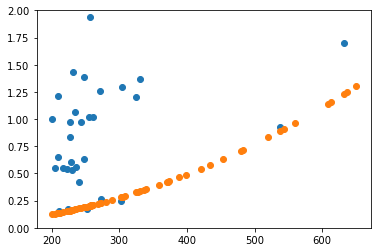

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as const
c = const.c.cgs.value
wl_shift = 6.8
dl = 1.5*1.207*(1.2*1e9*(data['LabWL(um)']*1e-4)**2/c)/2.354 * 1e4

nearest_line = np.empty_like(data['LabWL(um)'])

for i, wl in enumerate(data['LabWL(um)']):
    nearest_line[i] = np.sort(abs(wl+wl_shift-data['LabWL(um)']))[0]
plt.plot(data['LabWL(um)'], nearest_line, 'o')
plt.plot(data['LabWL(um)'], dl,'o')
plt.ylim([0,2])

In [9]:
print(nearest_line)

LabWL(um)
---------
      1.0
      1.0
  0.16286
  0.36955
  0.19329
      1.0
      1.0
      1.0
  0.32808
      1.0
      ...
      1.0
  0.47504
  0.21744
  0.23535
  0.94223
      1.0
      1.0
   0.0116
      1.0
   0.0416
      1.0
Length = 64 rows


## Investigate the bimodelity in CO rotational diagrams of COPS sources

In [1]:
from astropy.io import ascii
data = ascii.read('/Users/yaolun/test/CO21-20_cops.txt', names=['obj','N/g'])

   obj    
----------
GSS30-IRS1
RCrA-IRS7C
     BHR71
RCrA-IRS7B
     DKCha
     L1157


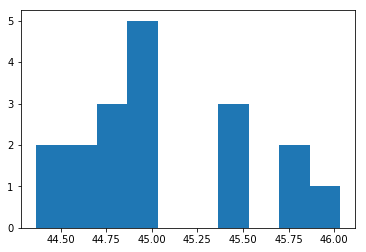

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n, bins, patches = plt.hist(data['N/g'], 10)
print(data['obj'][data['N/g'] >= 45.25])

In [7]:
# source list
obj_list = ['RCrA-IRS7B','RCrA-IRS7C','HH46','L723-MM','L1014',
            'L1157','Ced110','BHR71','IRAS03245','L1551-IRS5',
            'L1455-IRS3','B1-a','B1-c','IRAS03301','TMR1',
            'TMC1A','TMC1','IRAS15398','RNO91','GSS30-IRS1',
            'VLA1623','WL12','RCrA-IRS5A','L483','B335',
            'DKCha']
l_bol_list = [18.9, 70.4, 23.2, 3.3, 0.327,
                     5.26, 0.889, 13.5, 6.06, 23.5,
                     0.545, 2.47, 4.41, 3.91, 2.0,
                     2.62, 0.79, 1.49, 2.34, 19.7,
                     5.36, 2.23, 4.6, 8.78, 0.565,
                     35.1]
t_bol_list = [52.8, 62.6, 111.0, 66.8, 63.4,
                     40.1, 53.6, 51.1, 48.2, 110.0,
                     128.0, 79.9, 55.9, 354.0, 125.0,
                     159.0, 149.0, 43.2, 349.0, 129.0, 
                     33.2, 210.0, 115.0, 49.3, 45.5,
                     592.0]

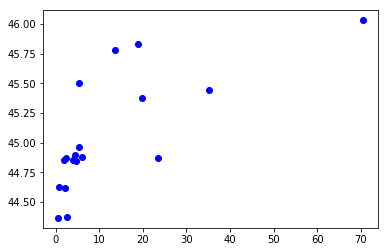

In [14]:
# L_bol
for o in data['obj']:
    plt.plot(l_bol_list[obj_list.index(o)], data['N/g'][data['obj'] == o].data,'bo')

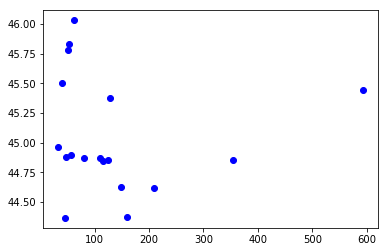

In [15]:
# T_bol
for o in data['obj']:
    plt.plot(t_bol_list[obj_list.index(o)], data['N/g'][data['obj'] == o].data,'bo')

In [4]:
from astropy.io import ascii
data = ascii.read('/Volumes/SD-Mac/CDF_archive_v2/CDF_archive_v2_lines.txt')
data = data[(data['Validity'] == 1) & (data['SNR'] >= 3) & (data['Pixel_No.'] == 'c')]

In [5]:
data[data['Line'] == 'p-H2O3_31-2_20']

Object,Line,LabWL(um),ObsWL(um),Sig_Cen(um),Str(W/cm2),Sig_str(W/cm2),FWHM(um),Sig_FWHM(um),Base(W/cm2/um),Noise(W/cm2/um),SNR,E_u(K),A(s-1),g,RA(deg),Dec(deg),Pixel_No.,Blend,Validity
str10,str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str5,str14,int64
GSS30-IRS1,p-H2O3_31-2_20,67.09082,67.10037,0.0048,1.940866e-20,3.938011e-21,0.03938,-998.0,2.415383e-17,1.43764e-19,3.221763,410.4,1.222,7,246.5887611,-24.3842757,c,x,1
RCrA-IRS7B,p-H2O3_31-2_20,67.09082,67.10063,0.00257,2.235734e-20,2.428184e-21,0.03938,-998.0,3.438995e-17,1.152098e-19,4.631042,410.4,1.222,7,285.4859165,-36.9584262,c,x,1
RCrA-IRS7C,p-H2O3_31-2_20,67.09082,67.09839,0.0027,3.583428e-20,4.091412e-21,0.03938,-998.0,4.880803e-17,1.795636e-19,4.76243,410.4,1.222,7,285.4810699,-36.9551852,c,x,1


In [6]:
data[data['Line'] == 'o-H2O3_30-2_21']

Object,Line,LabWL(um),ObsWL(um),Sig_Cen(um),Str(W/cm2),Sig_str(W/cm2),FWHM(um),Sig_FWHM(um),Base(W/cm2/um),Noise(W/cm2/um),SNR,E_u(K),A(s-1),g,RA(deg),Dec(deg),Pixel_No.,Blend,Validity
str10,str17,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str5,str14,int64
GSS30-IRS1,o-H2O3_30-2_21,66.43937,66.45057,0.00123,3.563073e-20,1.847483e-21,0.03939,-998.0,2.448813e-17,1.067922e-19,7.961746,410.7,1.243,21,246.5887611,-24.3842757,c,x,1
RCrA-IRS7B,o-H2O3_30-2_21,66.43937,66.45327,0.00167,4.829063e-20,3.405261e-21,0.03939,-998.0,3.462198e-17,1.34883e-19,8.54336,410.7,1.243,21,285.4859165,-36.9584262,c,x,1
RCrA-IRS7C,o-H2O3_30-2_21,66.43937,66.44973,0.00089,8.449059e-20,3.174306e-21,0.03939,-998.0,4.909973e-17,1.616103e-19,12.475624,410.7,1.243,21,285.4810699,-36.9551852,c,x,1


# Randomness test for correlation in log-log scale

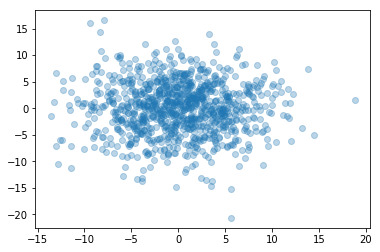

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(loc=0, scale=5, size=1000)
y = np.random.normal(loc=0, scale=5, size=1000)

plt.plot(x,y, 'o', alpha=0.3)

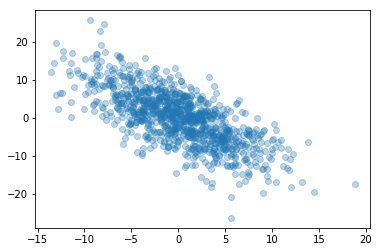

In [14]:
plt.plot(np.log10(10**x), np.log10(10**y/10**x), 'o', alpha=0.3)

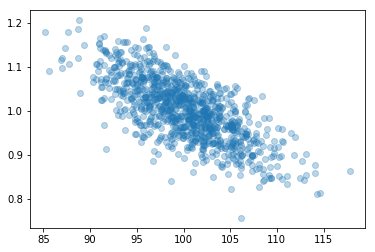

In [18]:
x = np.random.normal(loc=100, scale=5, size=1000)
y = np.random.normal(loc=100, scale=5, size=1000)
plt.plot(x, y/x, 'o', alpha=0.3)

In [6]:
from hyperion.model import ModelOutput
import astropy.constants as const
pc = const.pc.cgs.value
dstar = 100.0
m = ModelOutput('/Volumes/SD-Mac/model10.rtout')

In [28]:
sed = m.get_sed(group=2, inclination=0, aperture=-1, distance=dstar*pc,
                        uncertainties=True)

foo = open('/Users/yaolun/research/PREMISE_ERS/B335_model/simulated_spectrum_200mas_hires.txt','w')
foo.write('{:<12s}\t{:<12s}\n'.format('Wave.(um)','Flux(Jy)'))
for i, (w, f) in enumerate(zip(sed.wav, sed.val)):
    foo.write('{:<12.6f}\t{:<12.8e}\n'.format(w,f/(c/w*1e4)*1e23))
foo.close()

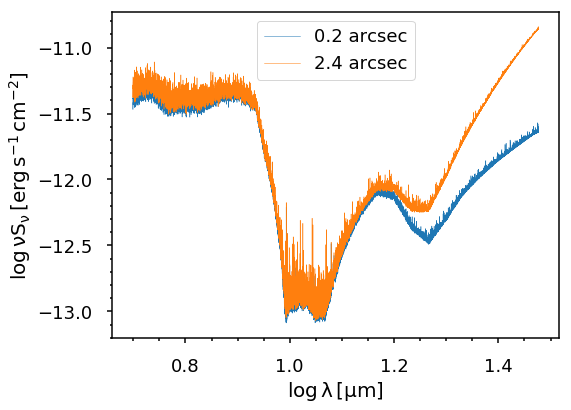

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

sed200 = m.get_sed(group=2, inclination=0, aperture=-1, distance=dstar*pc,
                        uncertainties=True)

aper200, = ax.plot(np.log10(sed200.wav), np.log10(sed200.val), linewidth=0.5)

sed2400 = m.get_sed(group=1, inclination=0, aperture=-1, distance=dstar*pc,
                        uncertainties=True)

aper2400, = ax.plot(np.log10(sed2400.wav), np.log10(sed2400.val), linewidth=0.5)

ax.legend([aper200, aper2400], ['0.2 arcsec', '2.4 arcsec'], fontsize=18, loc='upper center')

ax.set_xlabel(r'$\rm{log\,\lambda\,[{\mu}m]}$',fontsize=20)
ax.set_ylabel(r'$\rm{log\,\nu S_{\nu}\,[erg\,s^{-1}\,cm^{-2}]}$',fontsize=20)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/research/PREMISE_ERS/B335_MIRI.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [1]:
%matplotlib inline

/Users/yaolun/programs/misc/hyperion/get_obs.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sigma_dum[iwl] = np.std(np.hstack((flux_noise[i][0:sig_num/2],flux_noise[i][0:sig_num/2-iwl])))
/Users/yaolun/programs/misc/hyperion/get_obs.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sigma_dum[iwl] = np.std(flux_noise[i][iwl-sig_num/2:iwl+sig_num/2])
/Users/yaolun/programs/misc/hyperion/get_obs.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sigma_dum[iwl] = np.std(np.hstack((flux_noise[i][iwl:],flux_noise[i][len(wl_noise[i])-sig_num/2:])))


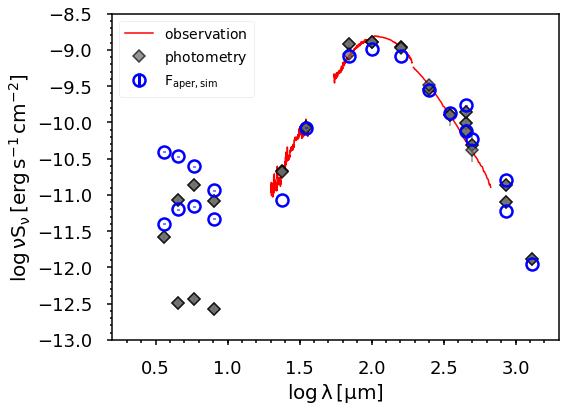

In [47]:
# modified from model_vs_obs in "sed_grid.py"
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from hyperion.model import ModelOutput
from hyperion.model import Model
from scipy.interpolate import interp1d
from hyperion.util.constants import pc, c, lsun
import sys
sys.path.append('/Users/yaolun/programs/misc/hyperion')
from get_obs import get_obs
from l_bol import l_bol

dstar = 100.0
modelname = '/model3/model3'
obs = '/Volumes/SD-Mac/B335_obs_data/'
# wl_aper = [3.6, 4.5, 5.8, 8.0, 24.0, 35.0, 70.0, 100.0, 160.0, 250.0, 350.0, 450.0, 500.0, 850.0, 1300.0]
rtout = False

# Read in the observation data and calculate the noise & variance
indir = '/Volumes/SD-Mac/'
outdir = '/Users/yaolun/test/'

source = get_obs(obs, obj='B335')  # in um and Jy
wave_obs, flux_obs, noise_obs = source['spec']
wave_phot, flux_phot, flux_sig_phot = source['phot']

# Convert the unit from Jy to erg cm-2 Hz-1
flux_obs = flux_obs*1e-23
noise_obs = noise_obs*1e-23
flux_phot = flux_phot*1e-23
flux_sig_phot = flux_sig_phot*1e-23

# Print the observed L_bol
wl_tot = np.hstack((wave_obs,wave_phot))
flux_tot = np.hstack((flux_obs,flux_phot))
flux_tot = flux_tot[np.argsort(wl_tot)]
wl_tot = wl_tot[np.argsort(wl_tot)]
l_bol_obs = l_bol(wl_tot,flux_tot*1e23, dstar)

# wl_aper = [3.6, 4.5, 5.8, 8.0, 8.5, 9, 9.7, 10, 10.5, 11, 16, 20, 24, 30, 70, 100, 160, 250, 350, 500, 850]

# Create the plot
mag = 1.5
fig = plt.figure(figsize=(8,6))
ax_sed = fig.add_subplot(111)

# Plot the observed SED
pacs, = ax_sed.plot(np.log10(wave_obs[wave_obs<50]),
                    np.log10(c/(wave_obs[wave_obs<50]*1e-4)*flux_obs[wave_obs<50]),
                    '-', color='r', alpha=1, linewidth=1.5, zorder=10)
spire, = ax_sed.plot(np.log10(wave_obs[(wave_obs>50)&(wave_obs<190.31)]),
                     np.log10(c/(wave_obs[(wave_obs>50)&(wave_obs<190.31)]*1e-4)*flux_obs[(wave_obs>50)&(wave_obs<190.31)]),
                     '-', color='r', alpha=1, linewidth=1.5, zorder=10)
irs, = ax_sed.plot(np.log10(wave_obs[wave_obs>194]),
                   np.log10(c/(wave_obs[wave_obs>194]*1e-4)*flux_obs[wave_obs>194]),
                   '-', color='r', alpha=1, linewidth=1.5, zorder=10)

# plot the observed photometry data
photometry, = ax_sed.plot(np.log10(wave_phot),
                          np.log10(c/(wave_phot*1e-4)*flux_phot),
                          'D', mfc='DimGray', mec='k',markersize=8, markeredgewidth=1.5, zorder=20, alpha=0.7)
ax_sed.errorbar(np.log10(wave_phot),np.log10(c/(wave_phot*1e-4)*flux_phot),
    yerr=[np.log10(c/(wave_phot*1e-4)*flux_phot)-np.log10(c/(wave_phot*1e-4)*(flux_phot-flux_sig_phot)),
          np.log10(c/(wave_phot*1e-4)*(flux_phot+flux_sig_phot))-np.log10(c/(wave_phot*1e-4)*flux_phot)],
    fmt='D',mfc='DimGray',mec='k',markersize=8, ecolor='DimGray',
    elinewidth=1.5, barsabove=True, linewidth=1.5, markeredgewidth=1.5, zorder=20, alpha=0.7)

# read in the raw output from hyperion and then save the extraction results in text file, otherwise read the text files instead.

# Open the model
if rtout:
    m = ModelOutput(indir+modelname+'.rtout')

    sed_inf = m.get_sed(group=0, inclination=0, aperture=-1, distance=dstar * pc)
    flux_aper = np.empty_like(wl_aper)
    unc_aper = np.empty_like(wl_aper)
    for i in range(0, len(wl_aper)):
        print(wl_aper[i])
        sed_dum = m.get_sed(group=i+1, inclination=0, aperture=-1, distance=dstar * pc)
        # use a rectangle function the average the simulated SED
        # apply the spectral resolution
        if (wl_aper[i] < 50.) & (wl_aper[i] >= 5):
            res = 60.
        elif wl_aper[i] < 5:
            res = 10.
        else:
            res = 1000.
        ind = np.where((sed_dum.wav < wl_aper[i]*(1+1./res)) & (sed_dum.wav > wl_aper[i]*(1-1./res)))
        if len(ind[0]) != 0:
            flux_aper[i] = np.mean(sed_dum.val[ind])
        else:
            f = interp1d(sed_dum.wav, sed_dum.val)
            flux_aper[i] = f(wl_aper[i])

    # make the variables consistent with others
    sim_inf = sed_inf.wav
    sim_sed_inf = sed_inf.val

    # save the results in text files
    # unapertured SED
    foo = open(outdir+modelname+'_sed_inf.txt','w')
    foo.write('%12s \t %12s \n' % ('wave','vSv'))
    for i in range(0, len(sed_inf.wav)):
        foo.write('%12g \t %12g \n' % (sed_inf.wav[i], sed_inf.val[i]))
    foo.close()
    # SED with convolution of aperture sizes
    foo = open(outdir+modelname+'_sed_w_aperture.txt','w')
    foo.write('%12s \t %12s \n' % ('wave','vSv'))
    for i in range(0, len(wl_aper)):
        foo.write('%12g \t %12g \n' % (wl_aper[i], flux_aper[i]))
    foo.close()
else:
    (sim_inf, sim_sed_inf, sim_sed_inf_unc) = np.genfromtxt(indir+modelname+'_sed_inf.txt', skip_header=1).T
    (wl_aper, flux_aper, unc_aper) = np.genfromtxt(indir+modelname+'_sed_w_aperture.txt', skip_header=1).T

# perform the same procedure of flux extraction of aperture flux with observed spectra
wl_aper = np.array(wl_aper)
obs_aper_wl = wl_aper[(wl_aper >= min(wave_obs)) & (wl_aper <= max(wave_obs))]
obs_aper_sed = np.empty_like(obs_aper_wl)
sed_tot = c/(wl_tot*1e-4)*flux_tot
# wl_tot and flux_tot are already hstacked and sorted by wavelength
for i in range(0, len(obs_aper_wl)):
    if (obs_aper_wl[i] < 50.) & (obs_aper_wl[i] >= 5):
        res = 60.
    elif obs_aper_wl[i] < 5:
        res = 10.
    else:
        res = 1000.
    ind = np.where((wl_tot < obs_aper_wl[i]*(1+1./res)) & (wl_tot > obs_aper_wl[i]*(1-1./res)))
    if len(ind[0]) != 0:
        obs_aper_sed[i] = np.mean(sed_tot[ind])
    else:
        f = interp1d(wl_tot, sed_tot)
        obs_aper_sed[i] = f(wl_aper[i])
    
aper_obs, = ax_sed.plot(np.log10(obs_aper_wl),np.log10(obs_aper_sed),
                        'D', mec='k', mfc='DimGray', color='DimGray', markersize=8, linewidth=1.5,
                        markeredgewidth=1.5, zorder=20, alpha=0.7)

aper = ax_sed.errorbar(np.log10(wl_aper),np.log10(flux_aper),
                       yerr=[np.log10(flux_aper)-np.log10(flux_aper-unc_aper),
                             np.log10(flux_aper+unc_aper)-np.log10(flux_aper)],
                       fmt='o', linestyle='None', mec='Blue', mfc='None', color='b',
                       markersize=12, markeredgewidth=2.5, linewidth=1.7, ecolor='Blue',
                       elinewidth=3, barsabove=True, zorder=30)

# # calculate the bolometric luminosity of the aperture
# l_bol_sim = l_bol(wl_aper, flux_aper/(c/np.array(wl_aper)*1e4)*1e23, dstar)
# print 'Bolometric luminosity of simulated spectrum: %5.2f lsun' % l_bol_sim

# plot setting
ax_sed.set_xlabel(r'$\rm{log\,\lambda\,[{\mu}m]}$',fontsize=20)
ax_sed.set_ylabel(r'$\rm{log\,\nu S_{\nu}\,[erg\,s^{-1}\,cm^{-2}]}$',fontsize=20)
[ax_sed.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax_sed.minorticks_on()
ax_sed.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax_sed.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

ax_sed.set_ylim([-13,-8.5])
ax_sed.set_xlim([0.2,3.3])

lg_data = ax_sed.legend([irs, photometry, aper],\
    [r'$\rm{observation}$',\
    r'$\rm{photometry}$',r'$\rm{F_{aper,sim}}$'],\
    loc='upper left',fontsize=14,numpoints=1,framealpha=0.3)

# Write out the plot
fig.savefig(outdir+'B335_sed.pdf',format='pdf',dpi=300,bbox_inches='tight')
# fig.clf()